# COD League Betting in PrizePicks

### COD League Teams
* Los Angeles Thieves
* Atlanta Faze
* Miami Heretics
* Minnesota Rokkr
* New York Subliners
* Seattle Surge
* Texas Optic
* Toronto Ultra
* Vegas Legion
* Carolina Royal Ravens
* Los Angeles Guerillas
* Boston Breach

### PrizePicks Prop Types - COD
* 'MAPS 1-3 Kills (Combo)'
* 'MAPS 1-3 Kills'
* 'MAP 1 Kills'
* 'MAP 2 Kills'
* 'MAP 3 Kills'

### Data Retrieval:
* Navigate to https://lookerstudio.google.com/reporting/b5e321ee-89d8-4f3d-b650-49ae2355405a/page/DZ7mD
* Get data for all available players
* CTRL + Click on the table, click 'Export', and save to csv file

In [1134]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(f'/Users/keimteim/Downloads/Player Game by Game_Game by Game Results_Table-32.csv')
player = input('Enter Player: ')
data = data[data['Player'] == player]
data = data.reset_index(drop=True)
data

Enter Player: Simp


,Player,Date,Team,Opponent,Stage,Map,Map #,Kills,Deaths,% of Teams Kills,% of Teams Deaths
0,Simp,"Jun 21, 2024",Faze,Ultra,Stage 4,6 Star,4,9,8,0.346154,0.250000
1,Simp,"Jun 21, 2024",Faze,Ultra,Stage 4,Sub Base,3,20,21,0.210526,0.262500
2,Simp,"Jun 21, 2024",Faze,Ultra,Stage 4,Karachi,2,8,6,0.258065,0.230769
3,Simp,"Jun 21, 2024",Faze,Ultra,Stage 4,Vista,1,22,31,0.236559,0.262712
4,Simp,"Jun 16, 2024",Faze,Thieves,Stage 4,6 Star,4,25,22,0.221239,0.229167
...,...,...,...,...,...,...,...,...,...,...,...
152,Simp,"Dec 8, 2023",Faze,Breach,Stage 1,Invasion,5,12,5,0.413793,0.227273
153,Simp,"Dec 8, 2023",Faze,Breach,Stage 1,Terminal,4,15,19,0.245902,0.296875
154,Simp,"Dec 8, 2023",Faze,Breach,Stage 1,Invasion,3,33,26,0.375000,0.288889
155,Simp,"Dec 8, 2023",Faze,Breach,Stage 1,Karachi,2,6,7,0.193548,0.218750


### Choose Prop

In [1135]:
prop = int(input('Specify Prop Type (1-3K combo = 1230, 1-3K = 123, 1K = 1, 2K = 2, 3K = 3): '))
window_calc = input('Calculate Ideal Rolling Window (yes) or Specify Manually (no)?: ')

if window_calc == 'yes':
    def best_rolling_average_interval(target_column, max_interval=10):
        data_copy = data.copy()
        numerical_data = data_copy.select_dtypes(include=[np.number]).drop(columns=['map #'], errors='ignore')
        best_interval = 0
        highest_corr = 0
        for interval in range(1, max_interval + 1):
            rolling_avg = numerical_data.rolling(window=interval).mean()
            valid_data = rolling_avg.dropna()
            correlation = valid_data.corr()[target_column].drop(target_column)
            if correlation.abs().max() > highest_corr:
                highest_corr = correlation.abs().max()
                best_interval = interval
        return best_interval, highest_corr

    target_column = 'Kills'  
    best_interval, highest_corr = best_rolling_average_interval(target_column)
    window = best_interval
    print(f"The best rolling average interval is {best_interval} with a correlation of {highest_corr}")
    print("")
elif window_calc == 'no':
    window = int(input('Enter Rolling Average Window Size: '))
else:
    print('Invalid Input')
    
team = data.loc[0, 'Team']
opp_input = input('Enter Upcoming Opponent (Surge, Ultra, etc.): ')
opp_ng = f'Opp_{opp_input}'
print("")

# Display player credentials
print(f'Player: {player}')
print(f'Team: {team}')
print(f'Upcoming Opponent: {opp_ng}')
print(f'Rolling Average Window Size: {window}')

# Filter the DataFrame
if len(str(prop)) == 1:
    data = data[data['Map #'] == prop]
elif len(str(prop)) == 3 or len(str(prop)) == 4:
    data_filtered = data[data['Map #'].isin([1, 2, 3])].copy()
    data_filtered.loc[:, 'unique_map'] = data_filtered.groupby(['Player', 'Date', 'Map #']).cumcount()
    aggregated_data_filtered = data_filtered.groupby(['Player', 'Date', 'unique_map', 'Opponent']).agg({
        'Kills': 'sum',
        'Deaths': 'sum',
        '% of Teams Kills': 'mean',
        '% of Teams Deaths': 'mean'
    }).reset_index()
    aggregated_data_filtered = aggregated_data_filtered.drop(columns=['unique_map'])
    data = aggregated_data_filtered

# Flip the rows (most recent game on bottom)
data = data.iloc[::-1].reset_index(drop=True)
    
data

Specify Prop Type (1-3K combo = 1230, 1-3K = 123, 1K = 1, 2K = 2, 3K = 3): 1
Calculate Ideal Rolling Window (yes) or Specify Manually (no)?: no
Enter Rolling Average Window Size: 3
Enter Upcoming Opponent (Surge, Ultra, etc.): Ultra

Player: Simp
Team: Faze
Upcoming Opponent: Opp_Ultra
Rolling Average Window Size: 3


,Player,Date,Team,Opponent,Stage,Map,Map #,Kills,Deaths,% of Teams Kills,% of Teams Deaths
0,Simp,"Dec 8, 2023",Faze,Breach,Stage 1,Karachi,1,33,23,0.320388,0.261364
1,Simp,"Dec 10, 2023",Faze,Thieves,Stage 1,Karachi,1,18,17,0.225000,0.246377
2,Simp,"Dec 16, 2023",Faze,Surge,Stage 1,Karachi,1,18,17,0.253521,0.265625
3,Simp,"Jan 12, 2024",Faze,Guerrillas,Stage 1,Sub Base,1,28,24,0.314607,0.255319
4,Simp,"Jan 14, 2024",Faze,Legion,Stage 1,Terminal,1,22,21,0.261905,0.276316
5,Simp,"Jan 20, 2024",Faze,Royal Ravens,Stage 1,Skidrow,1,21,13,0.259259,0.232143
6,Simp,"Jan 21, 2024",Faze,Optic,Stage 1,Invasion,1,25,19,0.312500,0.246753
7,Simp,"Jan 25, 2024",Faze,Guerrillas,Stage 1,Skidrow,1,21,17,0.291667,0.278689
8,Simp,"Jan 27, 2024",Faze,Optic,Stage 1,Sub Base,1,35,28,0.327103,0.259259
9,Simp,"Jan 28, 2024",Faze,Ultra,Stage 1,Karachi,1,20,22,0.238095,0.275000


### Preprocess Data

In [1115]:
# One-hot encode the 'Opponent' column
data = pd.get_dummies(data, columns=['Opponent'], prefix='Opp')
onehot_columns = data.filter(like='Opp_').columns
data[onehot_columns] = data[onehot_columns].astype(int)

# Drop redundant columns
if len(str(prop)) < 2:
    data = data.drop(['Player', 'Team', 'Map', 'Date', 'Stage', 'Map #'], axis=1)
else:
    data = data.drop(['Player', 'Date'], axis=1)

# Add a column 'TARGET: Kills' populated with the values from the column 'Kills'
data['TARGET: Kills'] = data['Kills']
data.drop('Kills', axis=1, inplace=True)

# Calculate the N-game rolling average for 'TARGET: Kills' excluding the current game
data['Kills_avg'] = data['TARGET: Kills'].rolling(window=window).mean().shift(1)

# create new df, make first column and set value
prediction_df = pd.DataFrame()
bottom_n_values = data['TARGET: Kills'].tail(window)
average_bottom_n = bottom_n_values.mean()

# Fill the first N rows of 'R_avg' with appropriate values
for i in range(1, window):
    data.loc[i, 'Kills_avg'] = data.loc[i - 1, 'TARGET: Kills']
    
data.loc[0, 'Kills_avg'] = data.loc[1, 'Kills_avg']

exclude_keywords = ['Opp_', 'TARGET: Kills', 'Kills_avg', 'Map #']
all_columns = data.columns
exclude_columns = [col for col in all_columns if any(keyword in col for keyword in exclude_keywords)]

# Iterate over all columns in the DataFrame
for column in data.columns:
    # Check if the column is not in the list of columns to exclude
    if column not in exclude_columns:
        # Calculate the N-game rolling average, excluding the current game
        data[f'{column}_avg'] = data[column].rolling(window=window).mean().shift(1)
        
        # add coluns to new df also
        prediction_df[f'{column}_avg'] = [data[column].tail(window).mean()]
        
        # Fill the first N empty rows with appropriate values
        for i in range(1, window):
            data.loc[i, f'{column}_avg'] = data.loc[i - 1, column]
            
        data.loc[0, f'{column}_avg'] = data.loc[1, f'{column}_avg']
    
        # Drop the original column
        data.drop(column, axis=1, inplace=True)

# add new df columns and set to 0
for column in exclude_columns:
    prediction_df[column] = 0
    
prediction_df['Kills_avg'] = [average_bottom_n]
prediction_df[opp_ng] = 1

# Reorder the columns of prediction_df to match the order of columns in data
prediction_df = prediction_df[data.columns]

prediction_df.drop('TARGET: Kills', axis=1, inplace=True)

# Save the DataFrames to CSV files
data.to_csv(f'{player}_data.csv', index=False)
prediction_df.to_csv(f'{player}_pred.csv', index=False)
    
data

,Opp_Breach,Opp_Faze,Opp_Guerrillas,Opp_Heretics,Opp_Legion,Opp_Optic,Opp_Rokkr,Opp_Royal Ravens,Opp_Subliners,Opp_Surge,Opp_Thieves,TARGET: Kills,Kills_avg,Deaths_avg,% of Teams Kills_avg,% of Teams Deaths_avg
0,0,0,0,0,0,0,1,0,0,0,0,66,66.000000,52.000000,0.244571,0.227121
1,0,0,0,0,0,0,0,0,0,1,0,66,66.000000,52.000000,0.244571,0.227121
2,0,0,0,0,0,1,0,0,0,0,0,54,66.000000,55.000000,0.231945,0.231964
3,0,1,0,0,0,0,0,0,0,0,0,42,62.000000,55.666667,0.249781,0.240808
4,0,0,0,0,0,1,0,0,0,0,0,71,54.000000,51.333333,0.263619,0.237482
5,0,0,0,0,0,0,0,0,0,1,0,74,55.666667,53.666667,0.293984,0.241430
6,0,0,0,0,0,0,0,0,1,0,0,83,62.333333,47.666667,0.340329,0.228599
7,1,0,0,0,0,0,0,0,0,0,0,53,76.000000,59.000000,0.331985,0.236698
8,0,1,0,0,0,0,0,0,0,0,0,51,70.000000,51.333333,0.325550,0.236037
9,0,0,0,0,0,0,0,0,1,0,0,76,62.333333,52.666667,0.274888,0.233254


In [1116]:
prediction_df

,Opp_Breach,Opp_Faze,Opp_Guerrillas,Opp_Heretics,Opp_Legion,Opp_Optic,Opp_Rokkr,Opp_Royal Ravens,Opp_Subliners,Opp_Surge,Opp_Thieves,Kills_avg,Deaths_avg,% of Teams Kills_avg,% of Teams Deaths_avg
0,0,0,0,0,0,0,0,0,0,0,0,46.333333,44.666667,0.278191,0.239612


### Feature Correlation Matrix

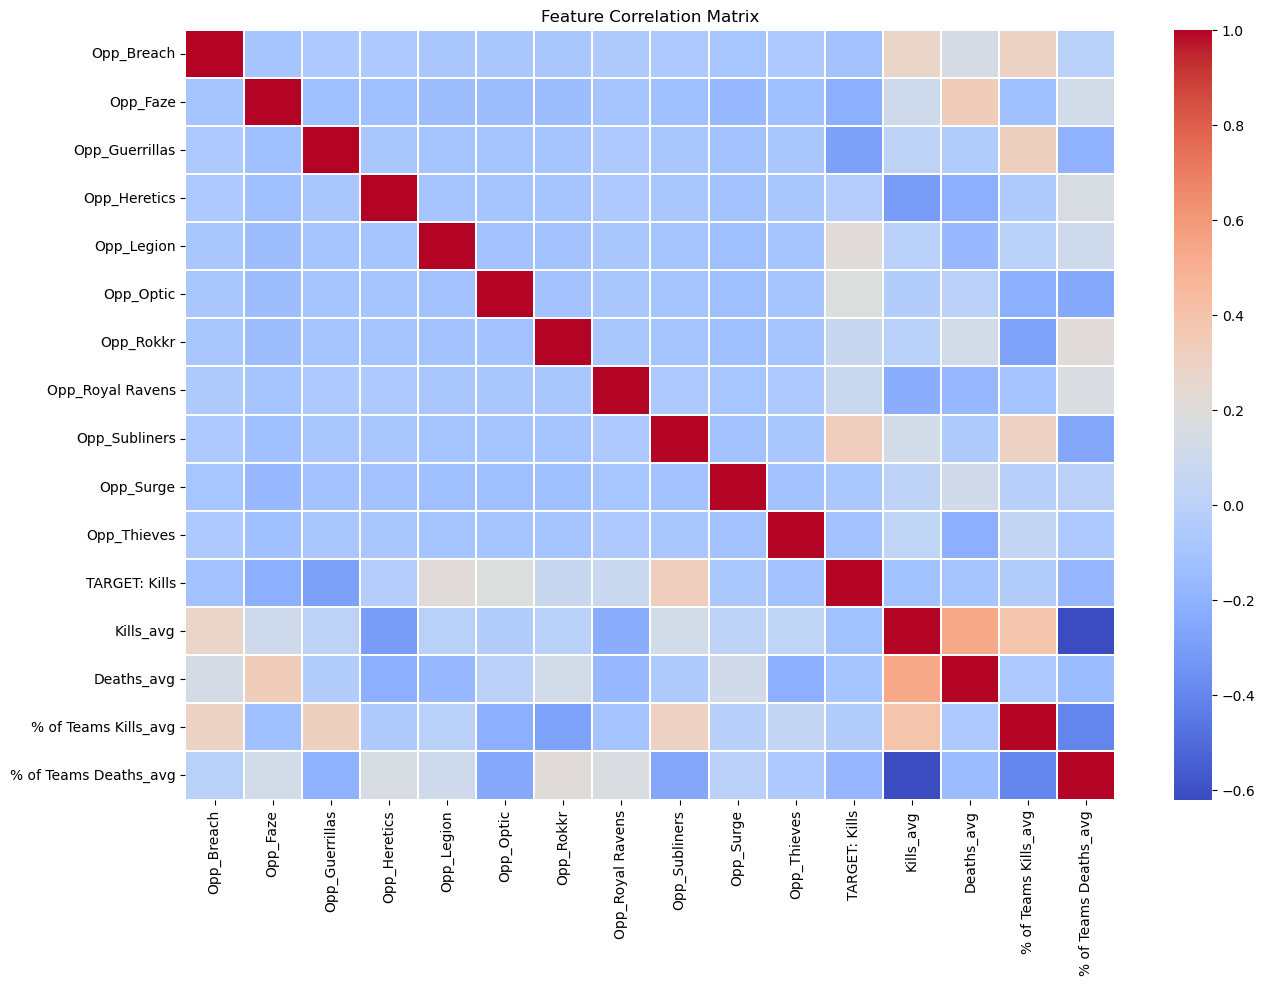

In [1117]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.1)
plt.title('Feature Correlation Matrix')
plt.show()

# ML Model

### Identify Best Model

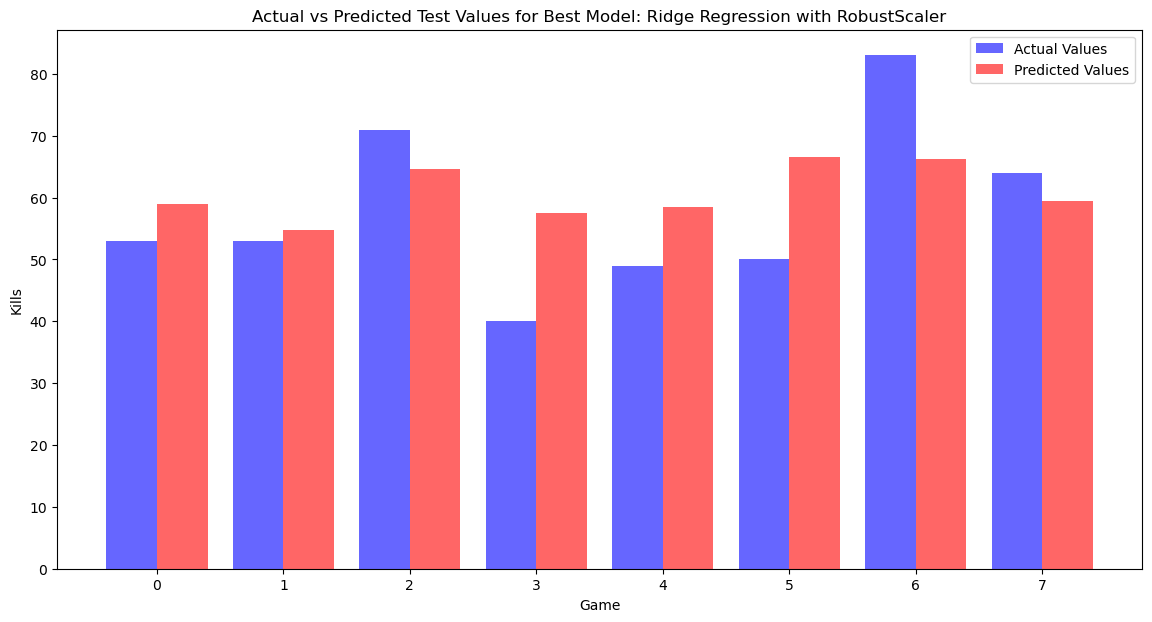

In [1118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt
import numpy as np

# Define features (X) and target (y)
X = data.drop(columns=['TARGET: Kills'])
y = data['TARGET: Kills']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define scalers
scalers = {
    'None': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet Regression': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regressor': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'Extra Trees Regressor': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=50, random_state=42)
}

# List to store results
results_list = []

# Evaluate each model with each scaler
for scaler_name, scaler in scalers.items():
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        evs = explained_variance_score(y_test, y_pred)
        # Custom metric combining MSE and R2
        fit_score = r2 - mse  # You can adjust this formula as needed
        results_list.append({
            'Model': model_name,
            'Scaler': scaler_name,
            'MSE': mse,
            'R-squared': r2,
            'MAE': mae,
            'EVS': evs,
            'Fit Score': fit_score
        })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Reset indices and sort the DataFrame by Fit Score value in descending order
results_df = results_df.reset_index(drop=True).sort_values(by='Fit Score', ascending=False)

# Find the best model and scaler combination based on Fit Score value
best_model_and_scaler = results_df.iloc[0]
best_model_name = best_model_and_scaler['Model']
best_scaler_name = best_model_and_scaler['Scaler']

# Extract the best model's predictions
best_model = models[best_model_name]
best_scaler = scalers[best_scaler_name]
if best_scaler:
    X_train_scaled = best_scaler.fit_transform(X_train)
    X_test_scaled = best_scaler.transform(X_test)
else:
    X_train_scaled = X_train
    X_test_scaled = X_test

best_model.fit(X_train_scaled, y_train)
best_y_pred = best_model.predict(X_test_scaled)

# Plot predictions vs actual values for the best model and scaler combination
plt.figure(figsize=(14, 7))
x_axis = np.arange(len(y_test))

plt.bar(x_axis - 0.2, y_test, width=0.4, label='Actual Values', color='b', alpha=0.6)
plt.bar(x_axis + 0.2, best_y_pred, width=0.4, label='Predicted Values', color='r', alpha=0.6)

plt.xlabel('Game')
plt.ylabel('Kills')
plt.title(f'Actual vs Predicted Test Values for Best Model: {best_model_name} with {best_scaler_name}')
plt.legend()
plt.show()

* Negative Fit Score: Typically indicates poor performance or potential underfitting.
* Fit Score < 0.5: May suggest some level of underfitting or poor generalization.
* Fit Score between 0.5 and 1.5: Often indicates reasonable model performance with some potential for improvement.
* Fit Score > 1.5: Generally indicates good model performance and good generalization.

In [1119]:
results_df

,Model,Scaler,MSE,R-squared,MAE,EVS,Fit Score
34,Ridge Regression,RobustScaler,131.214558,0.221784,9.869613,0.273860,-130.992774
44,Linear Regression,MaxAbsScaler,132.453125,0.214438,9.500000,0.366440,-132.238687
35,Lasso Regression,RobustScaler,136.122207,0.192677,9.560563,0.330554,-135.929530
36,ElasticNet Regression,RobustScaler,139.665298,0.171664,10.192325,0.200744,-139.493635
22,Linear Regression,MinMaxScaler,141.609375,0.160133,9.687500,0.339542,-141.449242
12,Ridge Regression,StandardScaler,144.129792,0.145185,9.702135,0.324418,-143.984607
33,Linear Regression,RobustScaler,144.402272,0.143569,9.485587,0.359852,-144.258703
0,Linear Regression,None,144.402272,0.143569,9.485587,0.359852,-144.258703
11,Linear Regression,StandardScaler,144.402272,0.143569,9.485587,0.359852,-144.258703
14,ElasticNet Regression,StandardScaler,144.672239,0.141968,9.845766,0.297407,-144.530271


In [1120]:
results_df.to_csv('results.csv')

### Predict

In [1121]:
import re

# Function to predict a new row of feature values
def predict_new_values(new_data):
    global conf_int_low, conf_int_high
    if best_scaler:
        new_data_scaled = best_scaler.transform(new_data)
    else:
        new_data_scaled = new_data
    
    prediction = best_model.predict(new_data_scaled)
    print(f"Prediction: {prediction[0]}")
    
    # Calculate prediction confidence interval (simple approach)
    y_pred_std = np.std(best_y_pred)
    confidence_interval = 1.96 * y_pred_std  # 95% confidence interval
    conf_int_low = prediction[0] - confidence_interval
    conf_int_high = prediction[0] + confidence_interval
    print(f"Prediction 95% Confidence Interval: {conf_int_low} to {conf_int_high}")
    return prediction[0]

# Your existing code to format the model name
formatted_model = re.sub(r'(?<!^)(?=[A-Z])', ' ', str(best_model).replace("()", ""))

# Specific formatting adjustment for 'K Nearest Neighbors'
if 'K Neighbors Regressor' in formatted_model:
    formatted_model = formatted_model.replace('K Neighbors Regressor', 'K-Nearest Neighbors')
elif 'Elastic Net(alpha=0.1)' in formatted_model:
    formatted_model = formatted_model.replace('Elastic Net(alpha=0.1)', 'ElasticNet Regression')
elif 'S V R' in formatted_model:
    formatted_model = formatted_model.replace('S V R', 'Support Vector Regressor')
elif 'Ada Boost Regressor(random_state=42)' in formatted_model:
    formatted_model = formatted_model.replace('Ada Boost Regressor(random_state=42)', 'AdaBoost Regressor')
elif 'Lasso(alpha=0.1)' in formatted_model:
    formatted_model = formatted_model.replace('Lasso(alpha=0.1)', 'Lasso Regression')
elif 'Ridge' in formatted_model:
    formatted_model = formatted_model.replace('Ridge', 'Ridge Regression')
elif 'Extra Trees Regressor(random_state=42)' in formatted_model:
    formatted_model = formatted_model.replace('Extra Trees Regressor(random_state=42)', 'Extra Trees Regressor')
elif 'Gradient Boosting Regressor(random_state=42)' in formatted_model:
    formatted_model = formatted_model.replace('Gradient Boosting Regressor(random_state=42)', 'Gradient Boosting')
elif 'Random Forest Regressor(random_state=42)' in formatted_model:
    formatted_model = formatted_model.replace('Random Forest Regressor(random_state=42)', 'Random Forest')
elif 'Decision Tree Regressor(random_state=42)' in formatted_model:
    formatted_model = formatted_model.replace('Decision Tree Regressor(random_state=42)', 'Decision Tree')

best_scaler_str = str(best_scaler)

if best_scaler_str != 'None':
    # Remove '()' from the scaler
    best_scaler_str = best_scaler_str.replace("()", "")

# Extract the 'MAE' value
mae_value = results_df.loc[(results_df['Model'] == formatted_model) & (results_df['Scaler'] == best_scaler_str), 'MAE'].values[0]
    
model_selection = input('Continue with best Model? (yes, no): ')
betting_line = float(input('Enter Betting Line (float): '))
print("")

if model_selection == 'yes':
    pred = predict_new_values(prediction_df)
elif model_selection == 'no':
    best_model = input('Choose Model: ')
    best_scaler = input('Choose Scaler (or None): ')
    pred = predict_new_values(prediction_df)
else:
    print('Invalid Input')
    
difference = abs(pred - betting_line)

if mae_value <= difference:
    valid = True
else:
    valid = False
    
if pred >= betting_line and valid:
    action = 'Over'
elif pred <= betting_line and valid:
    action = 'Under'
else:
    action = 'Uncertain'
    
print(f'MAE: {mae_value}')
print("")
display(HTML(f'<b>Model Conclusion: {action}</b>'))
print("")

Continue with best Model? (yes, no): yes
Enter Betting Line (float): 57.5

Prediction: 66.75723013857674
Prediction 95% Confidence Interval: 58.65683704601236 to 74.85762323114112
MAE: 9.869613047181986



In [1122]:
import pandas as pd
from datetime import datetime

def append_to_csv(player, model, line, prediction, conf_int_low, conf_int_high, mae, conclusion, file_name='prizepicks-cod.csv'):
    date = datetime.now().strftime('%Y-%m-%d')
    new_row = {
        "Date": date,
        "Player": player,
        "Rolling avg": window,
        "Best Model": model_selection,
        "Model": model,
        "Prop": prop,
        "Line": line,
        "Opponent": opp_ng,
        "Prediction": prediction,
        "Conf Int": f"{conf_int_low} to {conf_int_high}",
        "MAE": mae,
        "Conclusion": conclusion
    }
    try:
        df = pd.read_csv(file_name)
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    except FileNotFoundError:
        df = pd.DataFrame([new_row])
    df.to_csv(file_name, index=False)

# Example usage
append_to_csv(player, formatted_model, betting_line, round(pred, 2), round(conf_int_low, 2), round(conf_int_high, 2), round(mae_value, 2), action)

csv = pd.read_csv('prizepicks-cod.csv')
csv

,Date,Player,Rolling avg,Best Model,Model,Prop,Line,Opponent,Prediction,Conf Int,MAE,Conclusion
0,2024-06-25,Fame,3,yes,K-Nearest Neighbors,1,23.0,Opp_Ultra,21.20,14.55 to 27.85,5.09,Uncertain
1,2024-06-25,Kismet,3,yes,AdaBoost Regressor,1,23.5,Opp_Faze,20.38,14.58 to 26.19,4.95,Uncertain
2,2024-06-25,Drazah,3,yes,Lasso Regression,1,24.5,Opp_Subliners,25.05,20.01 to 30.09,2.55,Uncertain
3,2024-06-25,Skyz,3,yes,Support Vector Regressor,1,22.0,Opp_Faze,18.90,17.21 to 20.6,3.45,Uncertain
4,2024-06-25,Kremp,3,yes,Ridge Regression,1,24.0,Opp_Heretics,20.88,16.88 to 24.88,2.85,Under
...,...,...,...,...,...,...,...,...,...,...,...,...
86,2024-06-25,ReeaL,3,yes,Ridge Regression,123,56.5,Opp_Thieves,53.53,39.15 to 67.92,6.68,Uncertain
87,2024-06-25,JoeDeceives,3,yes,K-Nearest Neighbors,123,53.5,Opp_Heretics,53.40,52.46 to 54.34,7.04,Uncertain
88,2024-06-25,Vikul,3,yes,Random Forest,123,51.5,Opp_Thieves,47.12,37.22 to 57.02,9.61,Uncertain
89,2024-06-25,aBeZy,3,yes,Decision Tree,123,54.5,Opp_Subliners,60.00,42.01 to 77.99,7.22,Uncertain
